## Spectral Analysis using Xspec

In [1]:
from xspec import *                                                                                                                                                                                 
from ixpetools.xspeclib.io import loadpha
import matplotlib.pyplot as plt
from astropy.io import fits
import matplotlib as mpl
import numpy as np
import os
%matplotlib inline

2022-06-24 10:43:40 -    INFO - [__init__.py: 16 -   <module>()] - sucessfully import pyXspec


***Warning: You do not have an up-to-date version of Xspec.init
      in your ~/.xspec directory.  It is recommended that you move
      your old Xspec.init aside and start up XSPEC again.  This will
      place a new version Xspec.init in your directory, which you may
      then modify using your old settings.


### Load Spectra

In [2]:
os.chdir("../ixpetools/test/event_l2_xspec")
specs = loadpha(['ixpe01001299_det1_evt2_v01_picorr_wcscorr_barycorr_pwn_pha1.fits',
                 'ixpe01001299_det1_evt2_v01_picorr_wcscorr_barycorr_pwn_pha1q.fits',
                 'ixpe01001299_det1_evt2_v01_picorr_wcscorr_barycorr_pwn_pha1u.fits'])

['ixpe01001299_det1_evt2_v01_picorr_wcscorr_barycorr_pwn_pha1.fits', 'ixpe01001299_det1_evt2_v01_picorr_wcscorr_barycorr_pwn_pha1q.fits', 'ixpe01001299_det1_evt2_v01_picorr_wcscorr_barycorr_pwn_pha1u.fits']
1 spectrum  in use
 
Spectral Data File: ixpe01001299_det1_evt2_v01_picorr_wcscorr_barycorr_pwn_pha1.fits  Spectrum 1
Net count rate (cts/s) for Spectrum:1  1.532e-01 +/- 4.222e-04
 Assigned to Data Group 1 and Plot Group 1
  Noticed Channels:  1-375
  Telescope: IXPE Instrument: GPD  Channel Type: PI
  Exposure Time: 8.592e+05 sec
  Filtering Keys: 
    Stokes: 0
 Using fit statistic: chi
 Using Response (RMF) File            ixpe_d1_20170101_01.rmf for Source 1
 Using Auxiliary Response (ARF) File  ixpe_d1_20170101_01.arf



2 spectra  in use
 
Spectral Data File: ixpe01001299_det1_evt2_v01_picorr_wcscorr_barycorr_pwn_pha1q.fits  Spectrum 2
Net count rate (cts/s) for Spectrum:2  -1.782e-03 +/- 5.958e-04
 Assigned to Data Group 2 and Plot Group 2
  Noticed Channels:  1-375
  Telesc

Three PHA file are loaded, An `XspecSpec` object are created. Note that the background and response file are stored in the header of PHAs.

### Set models

In [3]:
specs.set_model("TBabs*powerlaw*polconst")
AllModels(1).polconst.psi = -50

# Use 2--8 keV data
specs.set_energy(energy_low=2, energy_high=8, ngroups='all')

2022-06-24 10:43:42 -    INFO - [io.py:148 - set_energy()] - Xspec cmd: ignore **-2.0 8.0-**

Model TBabs<1>*powerlaw<2>*polconst<3> Source No.: 1   Active/On
Model Model Component  Parameter  Unit     Value
 par  comp
                           Data group: 1
   1    1   TBabs      nH         10^22    1.00000      +/-  0.0          
   2    2   powerlaw   PhoIndex            1.00000      +/-  0.0          
   3    2   powerlaw   norm                1.00000      +/-  0.0          
   4    3   polconst   A                   1.00000      +/-  0.0          
   5    3   polconst   psi        deg      45.0000      +/-  0.0          
                           Data group: 2
   6    1   TBabs      nH         10^22    1.00000      = p1
   7    2   powerlaw   PhoIndex            1.00000      = p2
   8    2   powerlaw   norm                1.00000      = p3
   9    3   polconst   A                   1.00000      = p4
  10    3   polconst   psi        deg      45.0000      = p5
                   

tbvabs Version 2.3
Cosmic absorption with grains and H2, modified from
Wilms, Allen, & McCray, 2000, ApJ 542, 914-924
Questions: Joern Wilms
joern.wilms@sternwarte.uni-erlangen.de
joern.wilms@fau.de

http://pulsar.sternwarte.uni-erlangen.de/wilms/research/tbabs/

PLEASE NOTICE:
To get the model described by the above paper
you will also have to set the abundances:
   abund wilm

Note that this routine ignores the current cross section setting
as it always HAS to use the Verner cross sections as a baseline.


   176 channels (200-375) ignored in spectrum #     1

Fit statistic  : Chi-Squared              2.238297e+09     using 149 bins.
                 Chi-Squared              1.021435e+07     using 375 bins.

***Warning: Chi-square may not be valid due to bins with zero variance
            in spectrum number: 2
                 Chi-Squared              1.337030e+08     using 375 bins.

***Warning: Chi-square may not be valid due to bins with zero variance
            in spectrum number: 3
Total fit statistic                       2.382215e+09     with 894 d.o.f.

Test statistic : Chi-Squared              2.382215e+09     using 899 bins.

***Warning: Chi-square may not be valid due to bins with zero variance
            in spectrum number(s): 2 3 

 Null hypothesis probability of 0.000000e+00 with 894 degrees of freedom
 Current data and model not fit yet.

    50 channels (1-50) ignored in spectrum #     2
   176 channels (200-375) ignored in spectrum #     2

Fit statistic  : Chi-Square

### Fit and Plot spectra

In [4]:
specs.fit(stat='chi2') # set statistical method to chisquare
data = specs.plot(show=True, retrieve_data=True)

Default fit statistic is set to: Chi-Squared
   This will apply to all current and newly loaded spectra.

Fit statistic  : Chi-Squared              2.238297e+09     using 149 bins.
                 Chi-Squared              3.963908e+06     using 149 bins.
                 Chi-Squared              1.284872e+08     using 149 bins.
Total fit statistic                       2.370748e+09     with 442 d.o.f.

Test statistic : Chi-Squared              2.370748e+09     using 447 bins.
 Null hypothesis probability of 0.000000e+00 with 442 degrees of freedom
 Current data and model not fit yet.
                                   Parameters
Chi-Squared  |beta|/N    Lvl          1:nH    2:PhoIndex        3:norm           4:A         5:psi
7177.06      1482.15      -3      0.406015       1.19081    0.00498799      0.492256      -49.8945
3160.88      553264       -4      0.124239       1.52711    0.00753722      0.406779      -49.8288
613.62       307486       -5     0.0607673       1.60416    0.009

The parameter `show=True` in method `XspecSpec.plot()` present the Xspec plots in XWindow. You can also retrieve the data and make our own plots in Python. The retrieved `data` are structured data object optimized for `plot_stokes_spectra` method.

2022-06-24 10:43:42 - WARNING - [io.py:246 - plot_stokes_spectra()] - The style of plot requires the LaTeX package pre-installed. see https://pypi.org/project/SciencePlots/ for details.


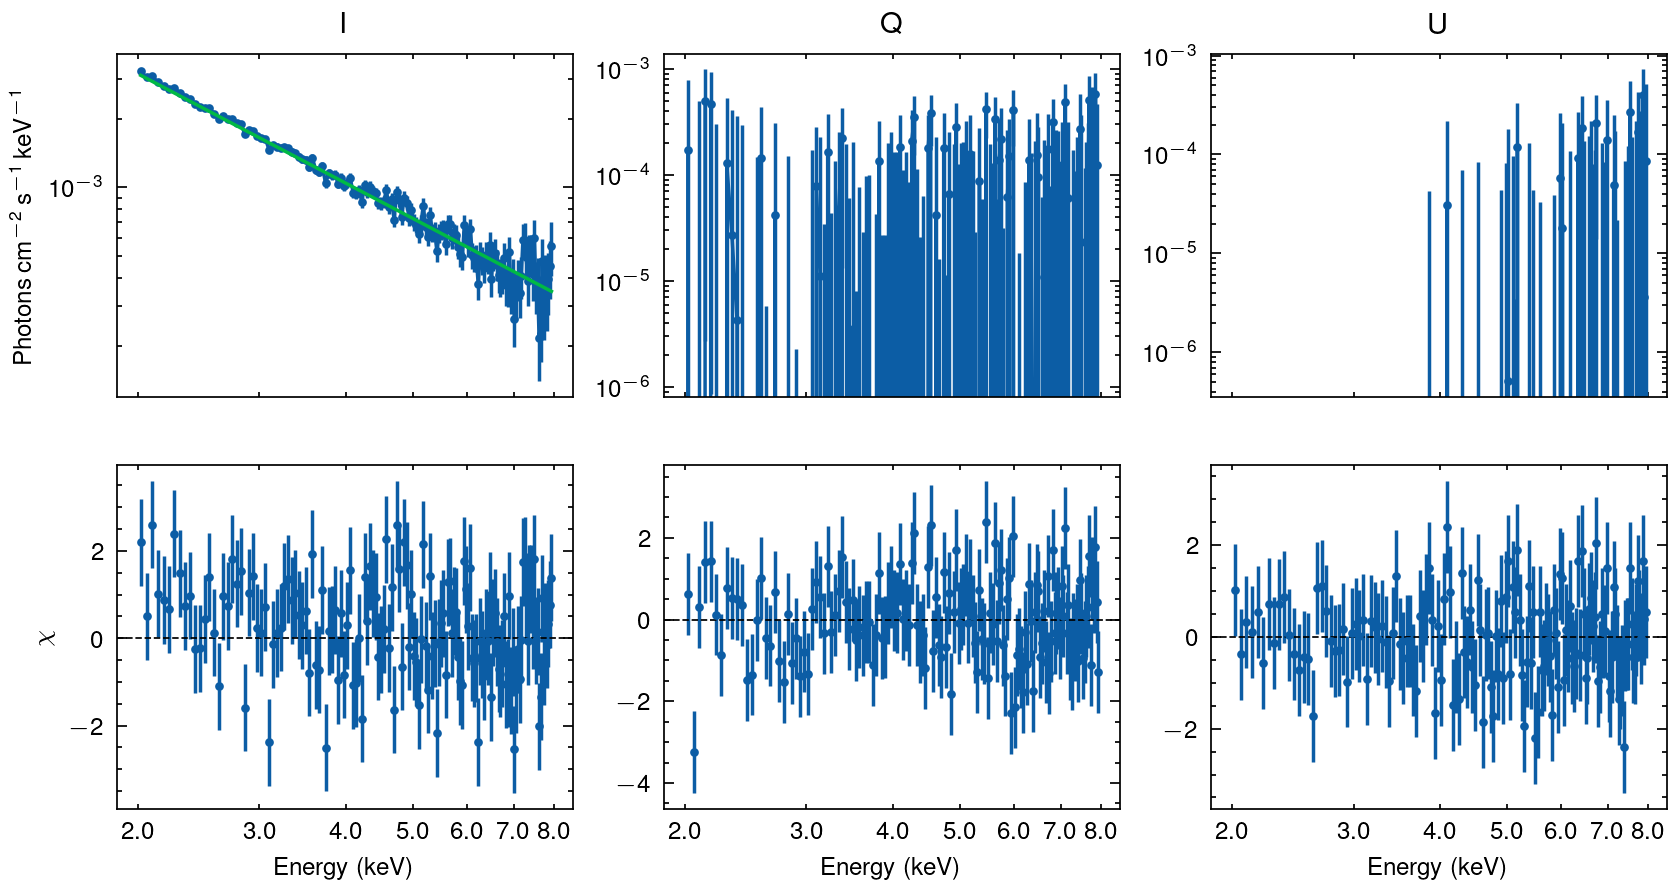

In [5]:
specs.plot_stokes_spectra(data)
plt.show()

#### MCMC analysis

We implemented MCMC tool in Xspec for spectral fitting and error estimation.

   All chains are now removed.
  New chain chain.fits is now loaded.

Chain chain.fits now has length 10000
   All loaded chains have the same length.



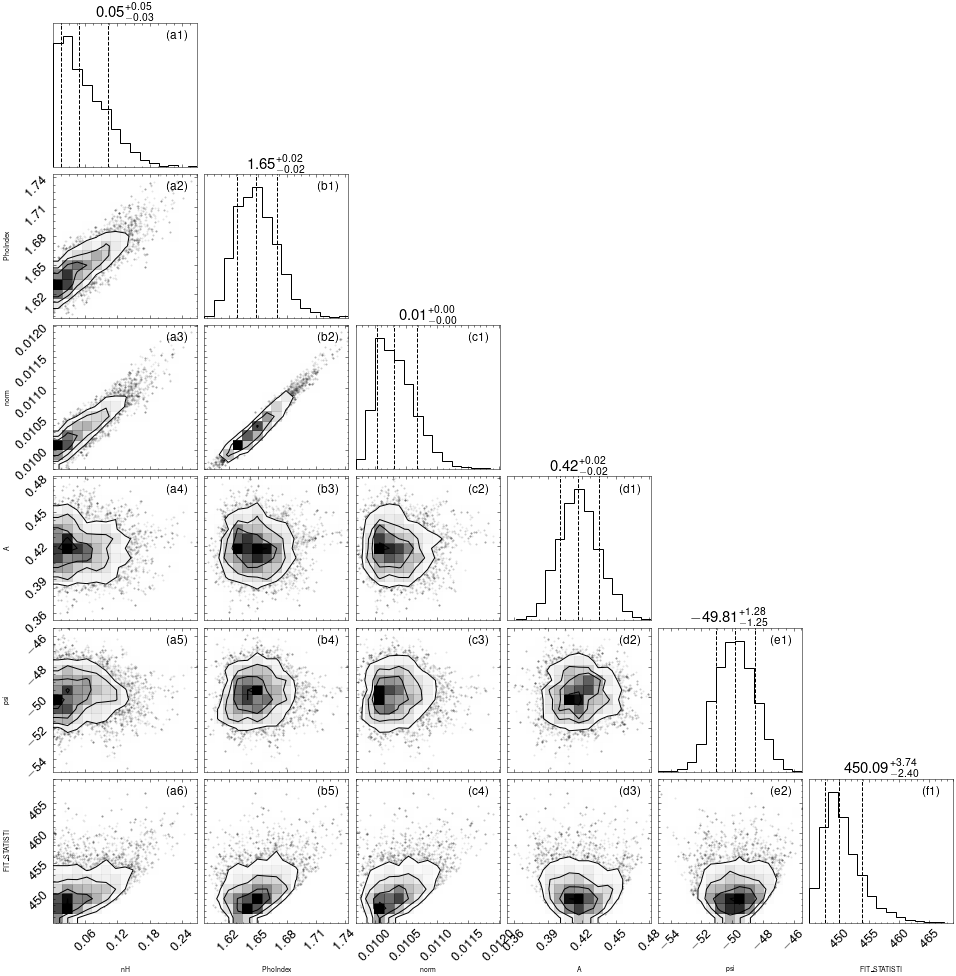

In [6]:
from ixpetools.utils.plot_chain import plot_corner
specs.mcmc('chain.fits',
          length=5000, burn=1000, nwalker=4)
plot_corner('chain.fits')
plt.show()

#### Show Contour

2022-06-24 10:44:47 - WARNING - [io.py:355 - plot_contour()] - The style of plot requires the LaTeX package pre-installed. see https://pypi.org/project/SciencePlots/ for details.
Errors calculated from chains
 Parameter   Credible Interval (68.27%)
     4     0.400373     0.435487    (-0.0182412,0.0168727)
     5      -51.071     -48.5279    (-1.10751,1.43563)

     Chi-Squared    Delta                A           psi
                 Chi-Squared             4             5

***Warning: Zero alpha-matrix diagonal element for parameter 1
 Parameter 1 is pegged at 1.822e-17 due to zero or negative pivot element, likely
 caused by the fit being insensitive to the parameter.
***Warning: Zero alpha-matrix diagonal element for parameter 1
 Parameter 1 is pegged at 1.822e-17 due to zero or negative pivot element, likely
 caused by the fit being insensitive to the parameter.
          490.35       45.53    0     0.33083    0     -56.321
***Warning: Zero alpha-matrix diagonal element for paramet

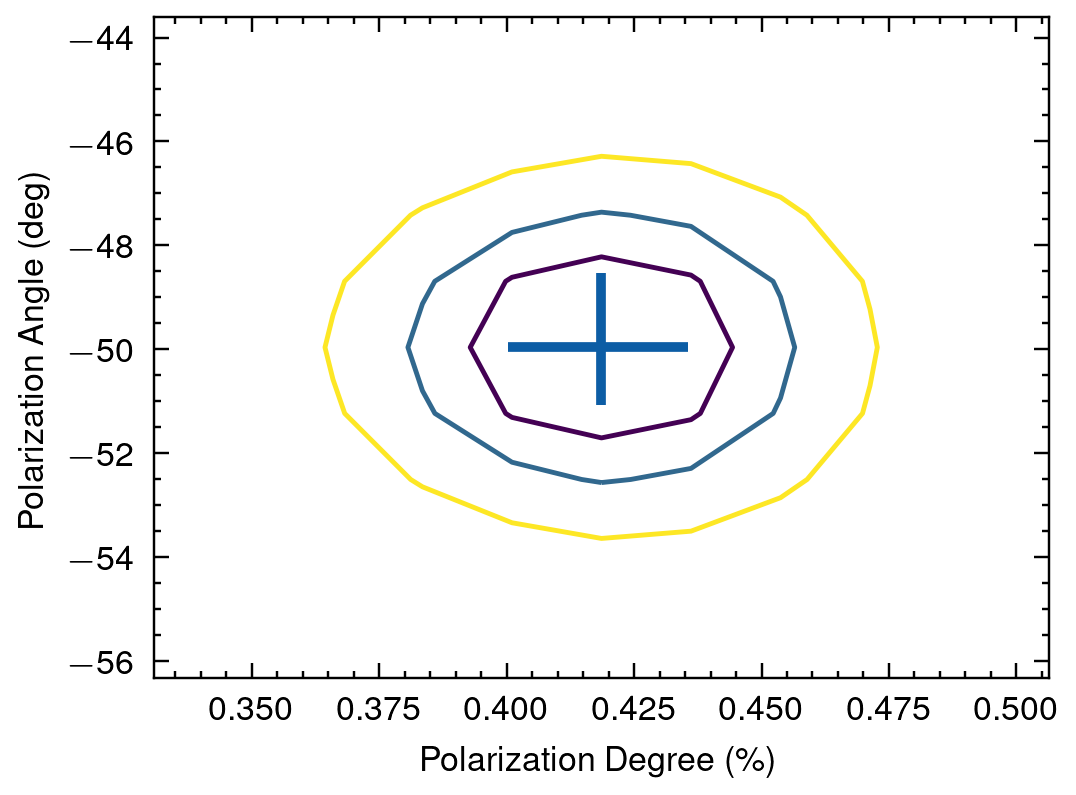

In [11]:
# If plot contour using steppar, the Fit.steppar in PyXspec must have executed.
mpl.rcParams['figure.dpi'] = 350
mpl.rcParams['figure.figsize'] = (8,4)
specs.plot_contour(steppar=True,A_parID=4, psi_parID=5,
                   A_steps=10, psi_steps=10,
                   show_chi2map=False)

2022-06-24 10:44:27 - WARNING - [io.py:355 - plot_contour()] - The style of plot requires the LaTeX package pre-installed. see https://pypi.org/project/SciencePlots/ for details.
Errors calculated from chains
 Parameter   Credible Interval (68.27%)
     4     0.400373     0.435487    (-0.0182412,0.0168727)
     5      -51.071     -48.5279    (-1.10751,1.43563)


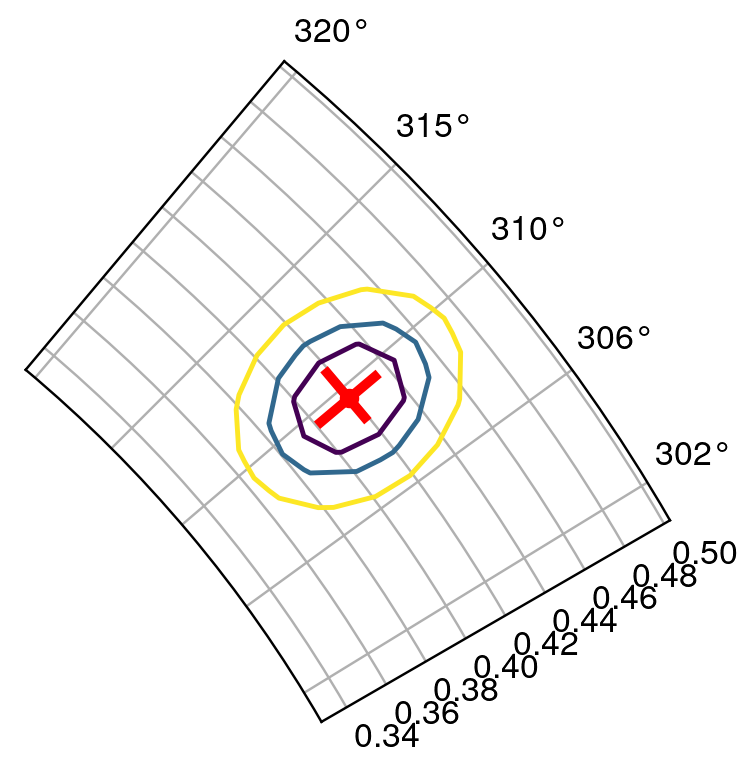

In [10]:
## Show plot in 'polar' projection
import matplotlib as mpl
mpl.rcParams['figure.dpi'] = 350
mpl.rcParams['figure.figsize'] = (8,6)
specs.plot_contour(steppar=False,A_parID=4, psi_parID=5,
                   projection='polar',
                   show_chi2map=False)